# <img style="float: left; padding-right: 100px; width: 300px" src="../images/logo.png">AI4SG Bootcamp:


##   Data Processing  For Continuous Variables
**Authors:** Davis David

## Import Modules

In [158]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from math import sqrt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [159]:
data = pd.read_csv('../data/daily-min-temperatures.csv')

In [160]:
# show the first five rows
data.head() 

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [161]:
# show the shape of the data
data.shape

(3650, 2)

In [162]:
#show columns 
data.columns 

Index(['Date', 'Temp'], dtype='object')

We have two columns Date and Temp

In [163]:
# show data info
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date    3650 non-null object
Temp    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [164]:
# convert the 'Date' column to datetime format 
data['Date']= pd.to_datetime(data['Date']) 

In [165]:
# show if data contain missing values 
data.isnull().sum() 

Date    0
Temp    0
dtype: int64

Our dataset does not have any missing values 

In [166]:
data.describe()  

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


There is a big gap between the minimum temp and the maximum temp

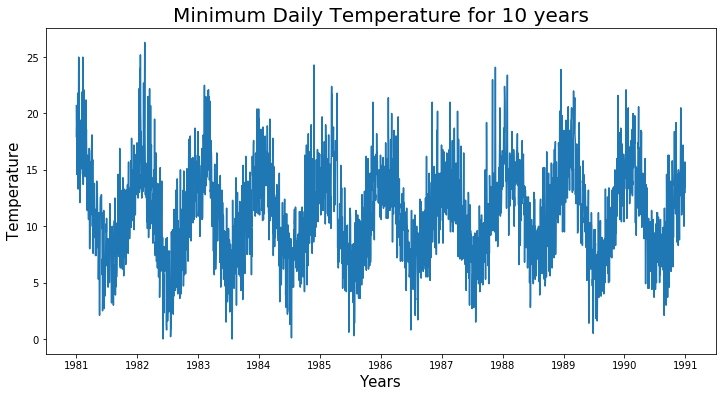

In [167]:
# draw a plot of date and time 
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Years', fontsize = 15)
ax.set_ylabel('Temperature', fontsize = 15)
ax.set_title('Minimum Daily Temperature for 10 years', fontsize = 20)
ax.plot('Date', 'Temp', data=data)

The dataset shows a strong seasonality component

## Apply Normalize in our Dataset 

In [168]:
# import normalize module 
from sklearn.preprocessing import normalize

In [169]:
# prepare data for normalization
temp = data['Temp'].values
temp = temp.reshape((len(temp), 1))

There are Three  types of norms 

- **Max Normalization** - the normalized values will fall between a range of 1 and to a value less than or equal to 0.
<img style="width: 300px" src="https://swaathi.com/public/posts/2017-04-29/max.png">

- **L1 Normalization (Least Absolute Deviation or LAD)** - L1 is basically minimizing the sum of the absolute differences (S) between the target value (x) and the estimated values (x’).
<img style="width: 400px" src="https://swaathi.com/public/posts/2017-04-29/l1.png">


- **L2 Normalization (Least Square Error or LSE)** - L2 minimizes the sum of the square of the differences (S) between the target value (x) and the estimated values (x’).
<img style="width: 400px" src="https://swaathi.com/public/posts/2017-04-29/l2.png">

In [170]:
#train the normalization
normalize_data = normalize(temp, norm='l1',axis=0)  #axis=0 for column-wise

In [171]:
# show sample of normalized data
normalize_data[:10]

array([[0.00050737],
       [0.00043874],
       [0.0004608 ],
       [0.00035785],
       [0.00038727],
       [0.00038727],
       [0.00038727],
       [0.00042648],
       [0.00053433],
       [0.00049021]])

In [172]:
## try L2 norm here 

## Apply MinMaxScaler in Our Dataset 

Good practice usage with the MinMaxScaler and other rescaling techniques is as follows:

- **Fit the scaler using available training data**. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function,
- **Apply the scale to training data**. This means you can use the normalized data to train your model. This is done by calling the transform() function
- **Apply the scale to data going forward**. This means you can prepare new data in the future on which you want to make predictions.

In [173]:
# prepare data for normalization
temp = data['Temp'].values
temp = temp.reshape((len(temp), 1))

In [174]:
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(temp)

In [175]:
#show minimum and maximum temperature
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 0.000000, Max: 26.300000


In [176]:
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(temp) 

In [177]:
# show 1o sample of normalized temp 
normalized[:10]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046],
       [0.60076046],
       [0.60076046],
       [0.66159696],
       [0.82889734],
       [0.76045627]])

In [178]:
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)

In [179]:
#show 10 sample of inversed temp
inversed[:10]

array([[20.7],
       [17.9],
       [18.8],
       [14.6],
       [15.8],
       [15.8],
       [15.8],
       [17.4],
       [21.8],
       [20. ]])

## Apply StandardScaler in our Dataset

In [180]:
# prepare data for normalization
temp_1 = data['Temp'].values
temp_1 = temp_1.reshape((len(temp_1), 1))

In [181]:
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(temp_1)

In [182]:
# show the mean and standard deviation 
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_))) 

Mean: 11.177753, StandardDeviation: 4.071279


In [183]:
# standardization the dataset 
normalized = scaler.transform(temp_1)

In [184]:
# show sample of normalized dataset 
normalized[:10]

array([[2.33888328],
       [1.65113873],
       [1.87219948],
       [0.84058266],
       [1.13533032],
       [1.13533032],
       [1.13533032],
       [1.52832721],
       [2.60906864],
       [2.16694715]])

In [185]:
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)


In [186]:
# show 10 sample of inversed values
inversed[:10]

array([[20.7],
       [17.9],
       [18.8],
       [14.6],
       [15.8],
       [15.8],
       [15.8],
       [17.4],
       [21.8],
       [20. ]])

##  Binning Example 

Sklearn provides a KBinsDiscretizer class that can take care of this. The only thing you have to specify are the number of bins (n_bins) for each feature and how to encode these bins (ordinal, onehot or onehot-dense)..The optional strategy parameter can be set to three values:
- uniform, where all bins in each feature have identical widths.
- quantile (default), where all bins in each feature have the same number of points.
- kmeans, where all values in each bin have the same nearest center of a 1D k-means cluster.

In [187]:
# import KbinDiscretizer 
from sklearn.preprocessing import KBinsDiscretizer 

In [188]:
# prepare data for normalization
temp_1 = data['Temp'].values
temp_1 = temp_1.reshape((len(temp_1), 1))

In [189]:
#train the Discretization
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
disc = disc.fit(temp_1)

In [190]:
#transform the dataset
discretized = disc.transform(temp_1)

In [191]:
# show sample of discretized 
discretized[:10]

array([[7.],
       [6.],
       [7.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [8.],
       [7.]])

In [192]:
# create a dataframe
discretized_df = pd.DataFrame(discretized, columns=['temp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C80DE41FD0>]],
      dtype=object)

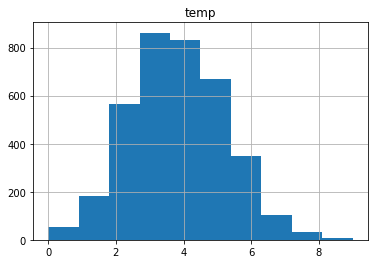

In [193]:
# draw the histogram
discretized_df.hist() 

In [194]:
# show bin edges 
disc.bin_edges_ 

array([array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
       23.67, 26.3 ])], dtype=object)

## Others resources 

- [Standardize or Normalize? — Examples in Python](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc)
- [Preprocessing with sklearn: a complete and comprehensive guide](https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9)